Question 1 

{'direct': False, 'energy': 1.8647, 'transition': '(0.270,0.270,0.540)-L'}
On peut voir que le cristal possède une bande interdite indirecte de 1.8647 eV. 

Question 2


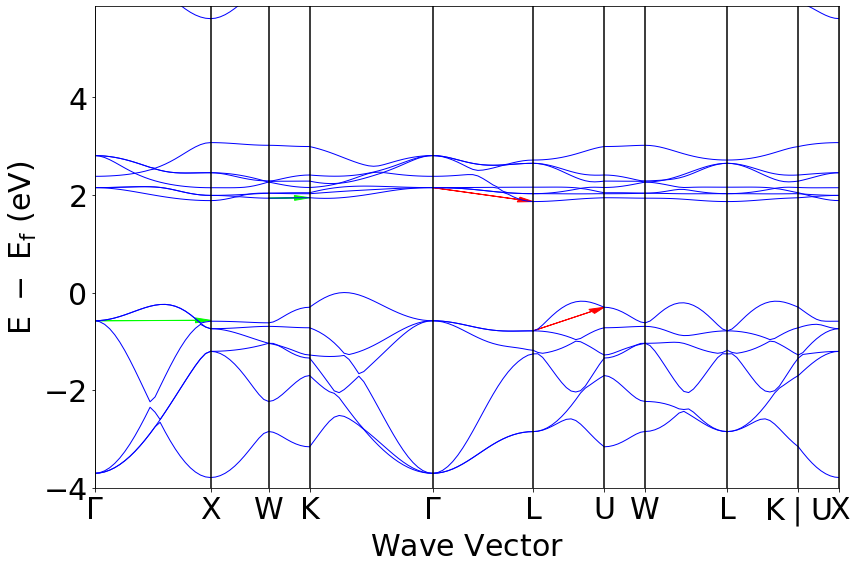

In [32]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen import Lattice
from matplotlib import pyplot 
import numpy as np
from pymatgen.electronic_structure.bandstructure import BandStructure as bs
from IPython.display import Markdown,display,Image
from pymatgen.electronic_structure.plotter import BSPlotter as bsp
from scipy import constants

with MPRester("rIpdpPuIE9I2anRpcTZ4") as m:
    
    print('Question 1', '\n')
    
    bandstructure = m.get_bandstructure_by_material_id("mp-20194")
    bandgap = bandstructure.get_band_gap()
    
    print(bandgap)
    print('On peut voir que le cristal possède une bande interdite indirecte de 1.8647 eV.', '\n')
    
    print('Question 2')
    
    fig = bsp(bandstructure)
    data = fig.bs_plot_data()
    ticks = fig.get_ticks()
    
    minval = 1000
    maxval = 0
    distminval = 0
    distmaxval = 0
    for i in range(0, 10):
        slope = abs(data.get("energy")[i].get("1")[11][0] - data.get("energy")[i].get("1")[11][-1])
        if slope < minval:
            minval = slope
            distminval = i
        if slope > maxval:
            maxval = slope
            distmaxval = i
    
    mincond= 1000
    maxcond = 0
    distmincond = 0
    distmaxcond = 0
    for i in range(0, 10):
        slope = abs(data.get("energy")[i].get("1")[12][0] - data.get("energy")[i].get("1")[12][-1])
        if slope < mincond:
            mincond = slope
            distmincond = i
        if slope > maxcond:
            maxcond = slope
            distmaxcond = i
    
    distance0 = np.zeros(10) #vecteur qui stocke les données d'entrée de la distance k
    distance1 = np.zeros(10) #vecteur qui stocke les données de sortie de la distance k
    l = 0
    m = 0
    for i in range(0, len(ticks.get("distance")) - 1):
        if ticks.get("distance")[i] != ticks.get("distance")[i - 1]:
            distance0[l] = ticks.get("distance")[i]
            l = l+1
        if ticks.get("distance")[i] != ticks.get("distance")[i + 1]:
            distance1[m] = ticks.get("distance")[i + 1]
            m = m+1
    
    fig.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
    distance = distance1-distance0

    pyplot.arrow(distance0[distminval],data.get("energy")[distminval].get("1")[11][0],distance[distminval],minval,length_includes_head=True,head_width=0.1,color=(0,1,0,1))
    pyplot.arrow(distance0[distmaxval],data.get("energy")[distmaxval].get("1")[11][0],distance[distmaxval],maxval,length_includes_head=True,head_width=0.1,color=(1,0,0,1))
    pyplot.arrow(distance0[distmincond],data.get("energy")[distmincond].get("1")[12][0],distance[distmincond],mincond,length_includes_head=True,head_width=0.1,color=(0,1,0,1))
    pyplot.arrow(distance0[distmaxcond],data.get("energy")[distmaxcond].get("1")[12][0],distance[distmaxcond],-maxcond,length_includes_head=True,head_width=0.1,color=(1,0,0,1))

In [31]:
print('Question 3', '\n')

hbar = 6.626 * 10**(-34) / (2 * np.pi)
meffval = hbar**2 / (-0.301 * 1.602 * 10**(-19) / (0.27 * 10**(10))**2)
meffcond = hbar**2 / ((2.04 - 1.865) * 1.602 * 10**(-19) / (distance[8] * 10**(10))**2)
print('Le masse effective au sommet de la bande de valence vaut', meffval, 'kg')
print('Le masse effective au minimum de la bande de conduction vaut', meffcond, 'kg')

Question 3 

Le masse effective au sommet de la bande de valence vaut -1.681286196327413e-30 kg
Le masse effective au minimum de la bande de conduction vaut 1.964553816212193e-29 kg
